%%html
<style>
    .myblock {
        font-style: normal;
        text-align: justify;
        margin-left: 0px;
        margin-right: 10px;
        margin-top: 10px;
        margin-bottom: 0px;
        padding: 10px;
        display: block;
    }
    
    .exercise {
        background-color: #AFEEEE;
    }
    
    .theorem {
        background-color: #FEC4A3;
    }
</style>

<center style="font-size:25px;padding-bottom:10px;"><b>Continuous stochastic processes</b></center>
<center style="font-size:22px;padding-bottom:10px;"><b>Homework 1</b></center>

<center style="font-size:20px;padding-bottom:10px;">José Antonio Álvarez Ocete</center>

<center style="font-size:20px;">Francisco Javier Sáez Maldonado</center>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
from scipy import stats
from collections import Counter
from sklearn.neighbors import KernelDensity

import sys
sys.path.append('./imports')
import arrival_process_simulation as arrival

<div class="myblock exercise">
<h1>Exercise 1</h1> <a href='#Ejercicio-1' class='anchor-link'>¶</a>

A Poisson process with rate $\lambda$ can be defined as a counting process $\{N(t); t \ge0 \}$ with the following properties:
    
(a) $N(0) = 0$

(b) $N(t)$  has independent and stationary increments.
    
(c) Let $\Delta N(t) = N(t + \Delta t) - N(t)$ with $\Delta t \rightarrow 0^+$. The following relations hold:
    
$$
\begin{align}
    \mathbb P[\Delta N(t) = 0] & \; = 1 - \lambda \Delta t + o(\Delta t) \qquad & (1) \\ 
    \mathbb P[\Delta N(t) = 1] & \; = \lambda \Delta t + o(\Delta t) \qquad & (2) \\
    \mathbb P[\Delta N(t) \ge 2] & \; = o(\Delta t) \qquad & (3)
\end{align}
$$
    
<b>a)</b> From this definition show that

$$
    \mathbb P[N(t) = n] = \frac{1}{n!} \lambda^n t^n e^{-\lambda t} \qquad (4) \\
$$  
     
<b>b)</b> Illustrate the validity of the derivation by comparing the empirical distribution obtained in a simulation of the Poisson process and the theorical distribution of $\mathbb P[N(t) = n]$ given by the equation (4) for the values $\lambda=10$ and $t=2$.
</div>

### Solution to a)

We will prove equation (4) by an inductive procedure.

#### Case n=0:

From statement (c) we know that $N(t + \Delta t) = \Delta N(t) + N(t)$. Then:

$$
\begin{align}
    \mathbb P[N(t + \Delta t) = 0] & = \mathbb P[\Delta N(t) + N(t) = 0] \\ 
    & \stackrel{(*)}{=} \mathbb P[\Delta N(t) = 0] \; \mathbb P[N(t) = 0] \\
    & \stackrel{(1)}{=} \mathbb P[\Delta N(t) = 0] \;  (1 - \lambda \Delta t + o(\Delta t)) \\
\end{align}
$$

where in $(*)$ we statement (b) and the fact that $N(t), \Delta N(t) \ge 0$. Rearranging the previous terms we obtain:

$$
    \frac{ \mathbb P[N(t + \Delta t) = 0] - \mathbb P[\Delta N(t) = 0] } {\Delta t} = - \lambda \mathbb P[\Delta N(t) = 0] + \frac{o(\Delta t)}{\Delta t} \mathbb P[\Delta N(t) = 0]
$$

Taking $\lim_{\Delta t \rightarrow 0^+}$ and using the definition of derivative we obtain:

$$
    \frac{\text d} {\text dt} \mathbb P[\Delta N(t) = 0] = - \lambda \mathbb P[\Delta N(t) = 0]
$$

This is a linear homogeneus diferential equation, which only solution that satifies the initial condition $\mathbb P[\Delta N(t) = 0] = 1$ is

$$
    \mathbb P[\Delta N(t) = 0] = e^{-\lambda t}
$$

#### Case n>0:

Let's prove the $n$-case with our induction hypothesis for $n-1$:

$$
    \mathbb P[N(t) = n-1] = \frac{1}{(n-1)!} \lambda^{n-1} t^{n-1} e^{-\lambda t} \qquad (5) \\
$$  

We begin with the same development as in the base case, but for and arbitrary $n$:

$$
\begin{align}
    \mathbb P[N(t + \Delta t) = n] & = \mathbb P[\Delta N(t) + N(t) = n] \\ 
    & \stackrel{(*)}{=} \sum_{k=0}^n \mathbb P[\Delta N(t) = k] \; \mathbb P[N(t) = n-k] \\
    & = \mathbb P[\Delta N(t) = 0] \; \mathbb P[N(t) = n] \\
    & + \mathbb P[\Delta N(t) = 1] \; \mathbb P[N(t) = n-1] \\
    & + \sum_{k=2}^n \mathbb P[\Delta N(t) = k] \; \mathbb P[N(t) = n-k] \\
    & \stackrel{(1,2,3)}{=} (1 - \lambda \Delta t + o(\Delta t)) \; \mathbb P[N(t) = n] \\
    & + (\lambda \Delta t + o(\Delta t)) \; \mathbb P[N(t) = n-1] \\
    & + o(\Delta t) \sum_{k=2}^n \mathbb \; \mathbb P[N(t) = n-k] \\
    & = (1 - \lambda \Delta t ) \; \mathbb P[N(t) = n] + \lambda \Delta t \; \mathbb P[N(t) = n-1] \\
    & + o(\Delta t) \sum_{k=0}^n \mathbb \; \mathbb P[N(t) = n-k] \\
\end{align}
$$

where in $(*)$ we statement (b) and the fact that $N(t), \Delta N(t) \ge 0$. Rearranging the previous terms we obtain:

$$
    \frac{ \mathbb P[N(t + \Delta t) = n] - \mathbb P[\Delta N(t) = n] } {\Delta t} = - \lambda \bigg( \mathbb P[\Delta N(t) = n] - \mathbb P[\Delta N(t) = n-1] \bigg) + \frac{o(\Delta t)}{\Delta t} \sum_{k=0}^n \mathbb \; \mathbb P[N(t) = n-k]
$$

Taking $\lim_{\Delta t \rightarrow 0^+}$ and using the definition of derivative we obtain:

$$
    \frac{\text d} {\text dt} \mathbb P[\Delta N(t) = n] = - \lambda \bigg( \mathbb P[\Delta N(t) = n] - \mathbb P[\Delta N(t) = n-1] \bigg)
$$

Using the induction hypothesis (6) we obtain our differential equation:

$$
    \frac{\text d} {\text dt} \mathbb P[\Delta N(t) = n] = - \lambda \bigg( \mathbb P[\Delta N(t) = n] - \frac{1}{(n-1)!} \lambda^{n-1} t^{n-1} e^{-\lambda t} \bigg)
$$

Let us rename our space variable in the previous equation understand it better. We are looking for a function $y(t)$ such that

$$
    \frac{\text d} {\text dt} y(t) = - \lambda \bigg( y(t) - \frac{1}{(n-1)!} \lambda^{n-1} t^{n-1} e^{-\lambda t} \bigg) \qquad (6) \\
$$

This differential equation is not linear and, as such, we can solve it using separated variables as we did in the base case. We may use Picard-Lindelöf's Theorem to prove that the solution is unique, and then prove that (4) is a solution to the equation (6). Thus, proving that is the only solution.

<div class="myblock theorem">
<h1>Theorem (Picard Lindelöf's)</h1>

Consider the initial value problem

$$
    \frac{\text d} {\text dt} y(t) = f(t,y(t)), \qquad y(t_{0})=y_{0}.
$$
    
Suppose $f$ is uniformly Lipschitz continuous in $y$ (meaning the Lipschitz constant can be taken independent of $t$) and continuous in $t$, then there exists a unique solution $y(t)$ to the initial value problem.
</div>

Since our function $f(t,y(t))$ is continuous in $t$, we just need to prove that is uniformly Lipschitz continuous in $y$.

$$
    \frac{\text d} {\text dy} f(t,y(t)) = - \lambda \in \mathbb R
$$

Since the derivative with respect to $y$ of $f$ is constant, $f$ is uniformly Lipschitz continuous and our initial value problem given by teh equation (6) and the initial condition $\mathbb P[\Delta N(t) = n] = 0$ is unique.

We just need to prove that (4) is a solution to the differential equation (6). Let $x(t)$ be

$$
    x(t) \equiv \frac{1}{n!} \lambda^n t^n e^{-\lambda t}.
$$  

Then,

$$
\begin{align}
    \frac{\text d} {\text dt} x(t) & = \frac{-\lambda^{n+1} t^{n}}{n!} e^{-\lambda t} + \frac{\lambda^{n} t^{n-1}}{(n-1)!} e^{-\lambda t} \\ 
    & = -\lambda \bigg(\frac{-\lambda^{n} t^{n}}{n!} e^{\lambda t} - \frac{\lambda^{n-1} t^{n-1}}{(n-1)!} e^{-\lambda t} \bigg) \\
    & = -\lambda \bigg(x(t) - \frac{\lambda^{n-1} t^{n-1}}{(n-1)!} e^{-\lambda t} \bigg)
\end{align}
$$

Proving that $x(t)$ as defined in equation (4) is a solution to the differential equation.

### Solution to b)

In order to simulate this Poisson process we will use the provided function $simulate\_poisson$. Since it returns the different times of arrival of a simulated Poisson process with the given parameters, we simply fix $t_1=2$ and count the number of events that ocurred in that legnth of time.

By repeating this process $n\_samples=10**4$ times, we obtain different values of $\mathbb P[N(2) = n]$. Finally, we use a $Counter$ to wrap the number of times $k$ events happened.

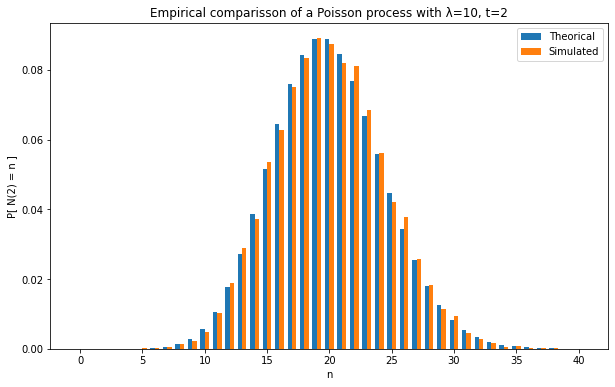

In [45]:
def exercise_1(t=2, max_n=40, lamb=10, n_samples=10**4):
    # Theoretical
    ns = np.arange(max_n+1)*1.0
    y_theoretical = (lamb*t)**ns * np.exp(-lamb*t) / factorial(ns)

    # Simulation
    counter = Counter([ len(arrival_times) for arrival_times in arrival.simulate_poisson(0, t, lamb, n_samples)])
    total_count = sum(counter.values())
    y_simulated = [counter[i]/total_count for i in ns]

    # Plotting
    width = 0.35
    plt.figure(figsize=(10, 6))
    plt.bar(ns - width/2, y_theoretical, width, label='Theorical')
    plt.bar(ns + width/2, y_simulated, width, label='Simulated')

    plt.xlabel('n')
    plt.ylabel('P[ N(2) = n ]')
    plt.title('Empirical comparisson of a Poisson process with λ=10, t=2')
    plt.legend()

exercise_1()

<div class="myblock exercise">
<h1>Exercise 2</h1> <a href='#Ejercicio-2' class='anchor-link'>¶</a>

Simulate a Poisson process with $\lambda = 5$. From these simulations show for different values of $n \in \{1,2,5,10\}$ that the probability density of the $n$-th arrival is

$$
    f_{S_n} (t) = \frac{1}{(n-1)!} \lambda^n t^{n-1} e^{-\lambda t}
$$
</div>

We will make use of kernel density estimations to approximate the theorical probability density function of the $n$th arrival, which actually matches the Erlang distribution. The $kde\_bandwidth$ parameter dictates the bandwidth of each kernemini-kernel used in the estimation. For lower values, a better estimation is obtained for lower $n$s, which have huge peaks in small areas. However, the smaller we make that parameter, the more we overfit, obtaining less smooth estimations.

In order to sample the $s_n$ time we re-use the provided function $simulate\_poisson$, and grab the $(n$-$th - 1)$ element. We will sample that value $n\_samples\_kde=10^4$ times for a good estimation. 

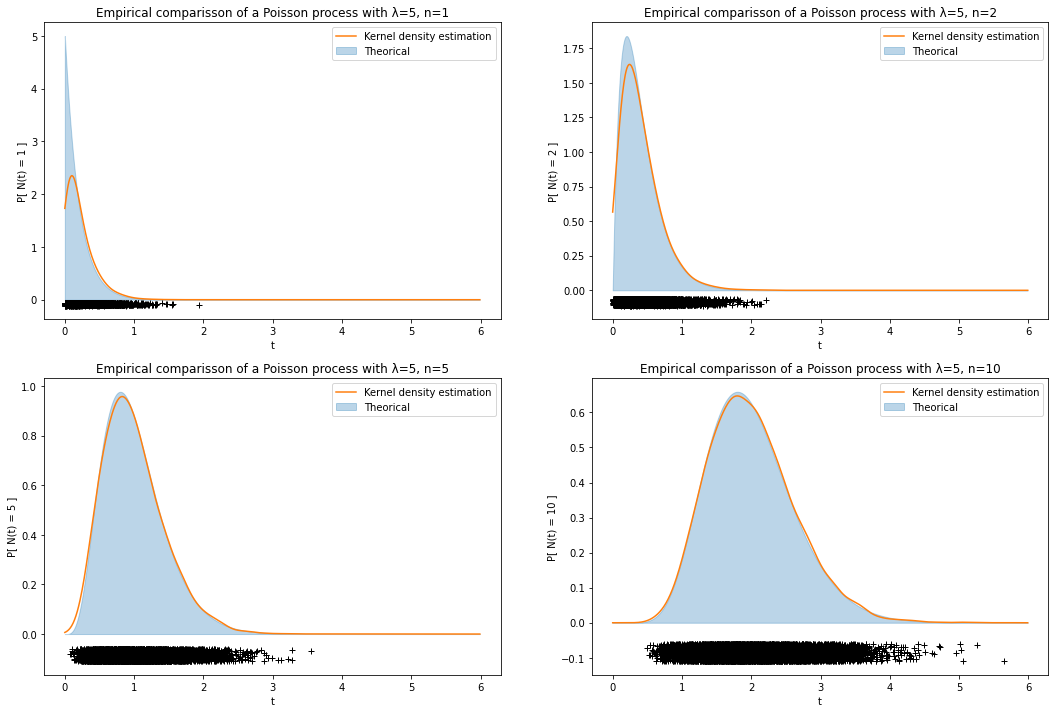

In [50]:
def plot_kde_in_axis(axis, ts, pdf, pdf_kde, samples, lamb, n):
    # Plot pdf and estimation
    axis.fill_between(ts, pdf, alpha=0.3, color='C0', label='Theorical')
    axis.plot(ts, pdf_kde, color='C1', label='Kernel density estimation')

    # Plot little x's near the X axis
    axis.plot(samples[:, 0], -0.06 - 0.05 * np.random.random(samples.shape[0]), "+k")

    axis.set_xlabel('t')
    axis.set_ylabel('P[ N(t) = {} ]'.format(n))
    axis.set_title('Empirical comparisson of a Poisson process with λ={}, n={}'.format(lamb, n))
    axis.legend()

def exercise_2(ns=[1,2,5,10], lamb=5, max_t=6, n_samples_kde=10**4, kde_bandwidth=0.1):
    ts = np.arange(max_t, step=0.01)
    _, axis = plt.subplots(2, 2, figsize=(18, 12))

    for ax, n in zip(axis.flatten(), ns):
        # Theorical
        sn_pdf = stats.erlang.pdf(ts, a=n, scale=1/lamb)

        # Kernel Density Estimation
        sn_empirical = [ arrival_times[n-1] for arrival_times in arrival.simulate_poisson(0, max_t, lamb, n_samples_kde)]
        sn_empirical = np.array(sn_empirical).reshape(-1, 1)
        kernel_density_estimatior = KernelDensity(kernel='gaussian', bandwidth=kde_bandwidth).fit(sn_empirical)
        sn_pdf_estimation = np.exp(kernel_density_estimatior.score_samples(np.array(ts).reshape(-1, 1)))

        # Plotting
        plot_kde_in_axis(ax, ts, sn_pdf, sn_pdf_estimation, sn_empirical, lamb, n)
    
exercise_2(kde_bandwidth=0.1)